# 아티스트 추천 시스템 구현하기

- tsv 파일에 저장된 정보로 아티스트 추천 시스템을 구현하자.

## 1. 데이터 탐색 및 전처리

데이터 불러오기

In [1]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


artis_MBID 제거

In [2]:
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


artis 문자열 소문자로 변경

In [3]:
data['artist'] = data['artist'].str.lower() # 검색을 쉽게하기 위해 아티스트 문자열을 소문자로 바꿔줍시다.
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


data.loc[0] : 0번째 index

In [4]:
data.loc[0,'user_id']

'00000c289a1829a808ac09c00daf10bc3c4e223b'

In [5]:
condition = (data['user_id']== data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


#### 유니크한 데이터 수 확인

In [6]:
# 유저 수
data['user_id'].nunique()

358868

In [7]:
# 아티스트 수
data['artist'].nunique()

291346

artis 별 group 만든 뒤 해당 그룹에 속한 user_id 개수를 센다!

In [8]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='artist', ylabel='Density'>

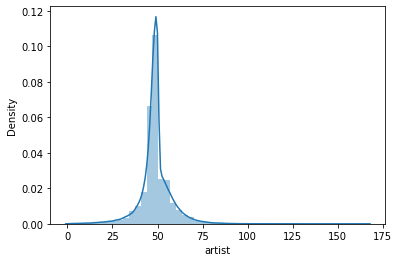

In [9]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
import seaborn as sns
user_count = data.groupby('user_id')['artist'].count()
sns.distplot(user_count)

In [10]:
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='play', ylabel='Density'>

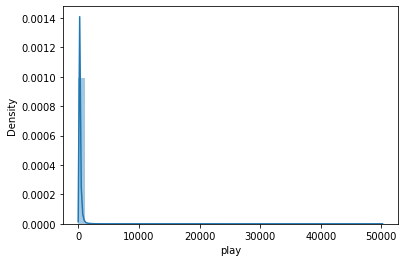

In [11]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
sns.distplot(user_median)

In [12]:
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

#### 추천 시스템을 위한  선호 아티스트 입력

In [13]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['black eyed peas' , 'maroon5' ,'jason mraz' ,'coldplay' ,'beyoncé']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = data.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyoncé,30


유저와 아티스트에 **indexing**

In [14]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()



# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [15]:
user_unique

array(['00000c289a1829a808ac09c00daf10bc3c4e223b',
       '00001411dc427966b17297bf4d69e7e193135d89',
       '00004d2ac9316e22dc007ab2243d6fcb239e707d', ...,
       'ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac', 'sep 20, 2008',
       'zimin'], dtype=object)

In [16]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [17]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


___

## 2. 모델 구성하기

#### 가정 
1. 한번 이라도 들었으면 선호한다고 판단한다.
2. 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다.

In [18]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']<2]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

147740,17535660
Ratio of only_one over all data is 0.84%


In [19]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.longlong'>'
	with 17535578 stored elements in Compressed Sparse Row format>

#### MF 모델 학습하기

In [21]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

factors : user, item의 vector를 몇 차원으로?

In [24]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

als 모델 input : Transpose

In [25]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.longlong'>'
	with 17535578 stored elements in Compressed Sparse Column format>

모델 훈련

In [26]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

zimin(사용자) black_eyed_peas(가수)의 관계를 알아보자.

In [27]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

In [28]:
zimin_vector

array([ 1.0722333 ,  0.29214722, -0.14975175,  0.33623993,  0.17200124,
       -0.02257453, -0.16899924,  0.32219929,  0.5945098 ,  0.6348248 ,
        0.3320443 , -1.2728395 , -0.2831411 , -0.47638267, -0.21952854,
        0.54649603,  0.6251771 , -1.0186877 , -0.6980245 ,  0.01623753,
        0.53533894,  0.4261659 , -0.5346567 ,  0.17339672,  0.69047034,
        0.8671474 , -0.33526438, -0.15310307, -0.54874265, -0.99680823,
        1.2932588 , -0.665634  ,  0.45426217,  0.65848005,  0.04397296,
       -1.1523591 , -0.16997562, -0.6289251 , -0.06865416, -0.47740608,
        1.166224  , -0.5419533 ,  1.1500205 , -0.7284797 , -0.35606036,
        0.8217323 ,  0.19349577,  0.83477026,  0.54742396,  0.5169014 ,
        0.07781529, -0.023775  , -0.5759309 , -0.39160696,  0.8627725 ,
        0.2151905 , -0.29170123,  1.1079329 , -0.92353827, -0.28779897,
        0.6499997 ,  0.195405  , -1.537378  , -1.6359705 ,  0.28010795,
       -0.6510694 , -0.05695351,  0.05567779,  0.89108634,  0.14

In [29]:
black_eyed_peas_vector

array([ 0.02403232,  0.00142448,  0.00545787,  0.00214468,  0.01413088,
        0.01088132,  0.01171622,  0.00226077,  0.01223674,  0.00687838,
        0.00356427, -0.01717655,  0.00290857, -0.01400016, -0.01019535,
        0.00992643,  0.01688271,  0.00558815,  0.00070305, -0.00658497,
        0.01332665,  0.01936608,  0.0054331 ,  0.00039809,  0.0223109 ,
        0.00951699,  0.01048547,  0.01604586, -0.00186577, -0.01151391,
        0.01219597, -0.00200915,  0.01670903,  0.02441994,  0.00175054,
        0.00552168, -0.00487912,  0.00466172,  0.00257748, -0.00350968,
        0.02842814, -0.00632382,  0.01099687,  0.00184826,  0.00025443,
        0.00794726, -0.00662887,  0.01827021,  0.01326836,  0.01746206,
        0.0103481 , -0.00492828,  0.00452914,  0.01041433,  0.01925135,
        0.00059073, -0.00697033,  0.01268597,  0.0035352 ,  0.00418866,
        0.03013451,  0.01461593, -0.01064028, -0.01103567,  0.01616594,
       -0.00764816, -0.00049642,  0.00655336,  0.00944912,  0.00

선호도?

In [30]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.50459695

queen에 대한 선호도

In [31]:
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.3150098

AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 활용해 비슷한 artist 확인

In [32]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0000001),
 (277, 0.9890647),
 (28, 0.9845748),
 (5, 0.9794328),
 (490, 0.97431344),
 (217, 0.972849),
 (473, 0.9703639),
 (247, 0.96793383),
 (418, 0.96001226),
 (910, 0.9577002),
 (1018, 0.95469254),
 (694, 0.9536155),
 (782, 0.9489002),
 (268, 0.94879496),
 (773, 0.9485811)]

index to artist

In [33]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'the killers',
 'red hot chili peppers',
 'oasis',
 'radiohead',
 'placebo',
 'the beatles',
 'u2',
 'nirvana',
 'the smashing pumpkins',
 'foo fighters',
 'the white stripes',
 'pink floyd',
 'nine inch nails']

In [34]:
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

In [35]:
get_similar_artist('2pac')

['2pac',
 'dr. dre',
 'the game',
 'notorious b.i.g.',
 'nas',
 'snoop dogg',
 'jay-z',
 '50 cent',
 'ice cube',
 'mobb deep']

In [36]:
get_similar_artist('lady gaga')

['lady gaga',
 'britney spears',
 'rihanna',
 'katy perry',
 'the pussycat dolls',
 'beyoncé',
 'christina aguilera',
 'kelly clarkson',
 'justin timberlake',
 'leona lewis']

recommend 메서드를 통해 좋아할 만한 artist 추천 받기

In [37]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True) #filter? 이미 평가한 아이템은 제외
artist_recommended

[(350, 0.4568599),
 (369, 0.45483273),
 (550, 0.44336677),
 (354, 0.4341827),
 (1800, 0.43010974),
 (2249, 0.4151482),
 (627, 0.4103082),
 (355, 0.40355417),
 (391, 0.39523342),
 (5555, 0.39222598),
 (621, 0.3910622),
 (274, 0.38969895),
 (564, 0.38607144),
 (901, 0.3752541),
 (409, 0.3716082),
 (618, 0.36943257),
 (2902, 0.36872625),
 (382, 0.3681556),
 (24, 0.36554453),
 (724, 0.3537748)]

In [38]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'justin timberlake',
 'britney spears',
 'nelly furtado',
 'lady gaga',
 'katy perry',
 'maroon 5',
 'madonna',
 'christina aguilera',
 'timbaland',
 'alicia keys',
 'michael jackson',
 'kanye west',
 'pink',
 'amy winehouse',
 'the pussycat dolls',
 'james blunt',
 'mika',
 'jack johnson',
 'lily allen']

why rihanna? explain method 활용

In [39]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

maroon5 ? implicit 0.4.2 ver bug

In [45]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.230627720990877),
 ('black eyed peas', 0.14538368520327527),
 ('jason mraz', 0.04536495558154075),
 ('coldplay', 0.037069144198291194),
 ('maroon5', 6.435516594937648e-05)]